In [1]:
%pip install wordcloud
%pip install xlrd

  Using cached wordcloud-1.9.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.3-cp312-cp312-macosx_11_0_arm64.whl (169 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached xlrd-2.0.1-py2.py3-none-any.whl.metadata (3.4 kB)
Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
# nltk.download()
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


2024-09-25 03:49:14.207 python[10579:261471] +[IMKClient subclass]: chose IMKClient_Legacy
2024-09-25 03:49:14.207 python[10579:261471] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


In [5]:
all_files = glob.glob('myCabinetExcelData****.xls')

all_files = sorted(all_files)

all_files

['myCabinetExcelData (1).xls',
 'myCabinetExcelData (2).xls',
 'myCabinetExcelData (3).xls',
 'myCabinetExcelData (4).xls',
 'myCabinetExcelData (5).xls',
 'myCabinetExcelData (6).xls',
 'myCabinetExcelData (7).xls',
 'myCabinetExcelData (8).xls',
 'myCabinetExcelData (9).xls',
 'myCabinetExcelData.xls']

In [7]:
all_files_data = [] # 저장할 리스트

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0] # 출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
95,NaN,96,Smart city big data analytics: An advanced review,"Soomro, Kamran; Bhutta, Muhammad Nasir Mumtaz;...",John Wiley & Sons Ltd,2019
96,NaN,97,A watchdog approach - name-matching algorithm ...,"Kirubakaran, Anusuya; Aramudhan, M.",Inderscience,2018
97,NaN,98,An intelligent approach to Big Data analytics ...,"Verma, Neha; Singh, Jatinder",Emerald Group Publishing Limited,2017
98,NaN,99,How organisations leverage Big Data: a maturit...,"Comuzzi, Marco; Patel, Anit",Emerald Group Publishing Limited,2016


In [9]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True)

all_files_data_concat # 출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
995,NaN,96,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C.",unknown,2017
996,NaN,97,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
997,NaN,98,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2016
998,NaN,99,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018


In [11]:
#제목 추출
all_title = all_files_data_concat['제목']

all_title # 출력하여 내용 확인

0      Guest Editorial: Big Media Data: Understanding...
1      Guest Editorial: Big Scholar Data Discovery an...
2        Guest Editorial: Big Data Analytics and the Web
3      Parallel computing for preserving privacy usin...
4                           NoSQL databases for big data
                             ...                        
995    Guest Editorial: Big Media Data: Understanding...
996    Guest Editorial: Big Scholar Data Discovery an...
997    Guest Editorial: Big Media Data: Understanding...
998    Speed Up Big Data Analytics by Unveiling the S...
999          Architecting Time-Critical Big-Data Systems
Name: 제목, Length: 1000, dtype: object

In [13]:
stopWords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [15]:
words = []

for title in all_title:
    EnWords = re.sub(r'[^a-zA-z]+', ' ', str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

print(words)

[['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data'], ['nosql', 'database', 'big', 'data'], ['computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow'], ['towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application'], ['new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean'], ['five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics'], ['towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud'], ['large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation'], ['hierarc

In [17]:
words2 = list(reduce(lambda x, y: x + y, words))
print(words2)

['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data', 'nosql', 'database', 'big', 'data', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application', 'new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean', 'five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics', 'towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud', 'large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation', 'hierarchical', 'distributed', 

In [19]:
count = Counter(words2)
count

Counter({'data': 1645,
         'big': 1353,
         'analytics': 137,
         'analysis': 67,
         'based': 62,
         'using': 57,
         'system': 50,
         'science': 50,
         'management': 48,
         'challenge': 47,
         'approach': 44,
         'mining': 40,
         'new': 38,
         'research': 38,
         'health': 37,
         'model': 37,
         'cloud': 34,
         'smart': 34,
         'learning': 33,
         'opportunity': 31,
         'processing': 30,
         'technology': 28,
         'small': 27,
         'framework': 26,
         'information': 26,
         'computing': 25,
         'application': 25,
         'driven': 24,
         'social': 24,
         'issue': 24,
         'quality': 23,
         'network': 23,
         'deal': 23,
         'knowledge': 22,
         'efficient': 22,
         'review': 22,
         'use': 22,
         'era': 22,
         'healthcare': 21,
         'storage': 21,
         'service': 21,
         'per

In [21]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag)) > 1 ):
        word_count[tag] = counts
        print('%s : %d'% (tag, counts))

data : 1645
big : 1353
analytics : 137
analysis : 67
based : 62
using : 57
system : 50
science : 50
management : 48
challenge : 47
approach : 44
mining : 40
new : 38
research : 38
health : 37
model : 37
cloud : 34
smart : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
framework : 26
information : 26
computing : 25
application : 25
driven : 24
social : 24
issue : 24
quality : 23
network : 23
deal : 23
knowledge : 22
efficient : 22
review : 22
use : 22
era : 22
healthcare : 21
storage : 21
service : 21
perspective : 21
`` : 20
open : 20
platform : 19
survey : 19
making : 19
process : 19
distributed : 18
large : 18


<function matplotlib.pyplot.show(close=None, block=None)>

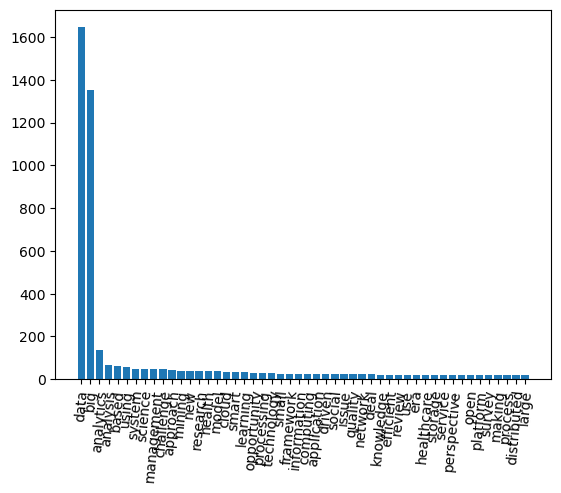

In [23]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 85)
plt.show

In [25]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,3
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


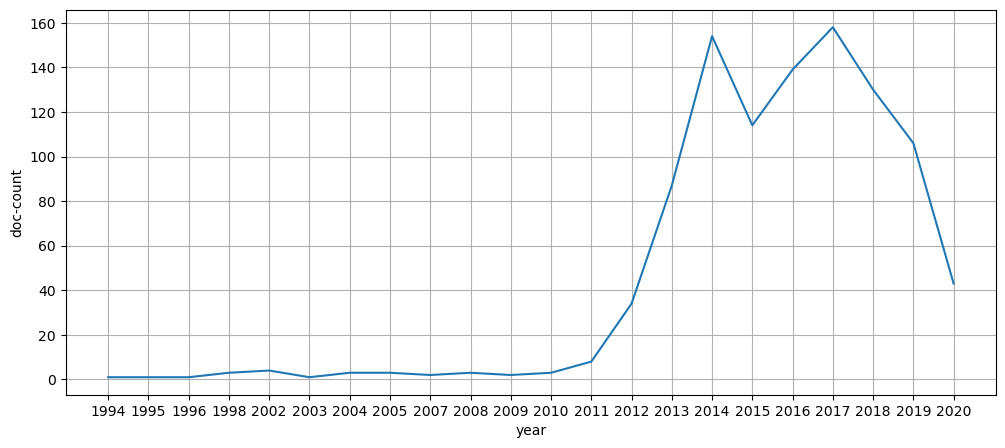

In [27]:
plt.figure(figsize = (12, 5))
plt.xlabel('year')
plt.ylabel('doc-count')
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

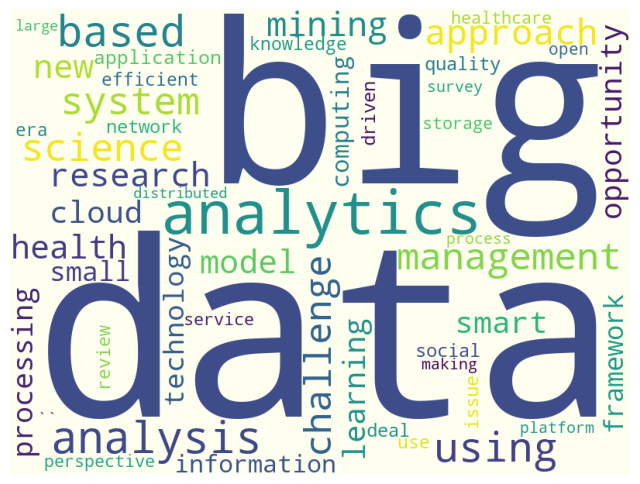

In [29]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc. generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [31]:
# 검색어로 사용한 big, data 항목 제거
del word_count['big']
del word_count['data']

In [33]:
#히스토그램 표시 옵션

In [1]:
%pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install jpype1

Note: you may need to restart the kernel to use updated packages.


In [1]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [3]:
inputFileName = '4차 산업혁명'
data = json.loads(open(inputFileName + '.json', 'r', encoding = 'utf-8').read())
data # 작업 내용 확인

[{'created_time': '2018-06-20 18:06:39',
  'link': 'https://www.facebook.com/etnews.kr/videos/1981346601899735/',
  'message': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.',
  'name': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"',
  'post_id': '407886705912407_1981346601899735',
  'total_comments': 3},
 {'created_time': '2018-06-14 10:41:16',
  'link': 'http://www.etnews.com/20180612000347',
  'message': '로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.',
  'name': '기술력 갖춘 로봇기업 몸값 치솟는다',
  'post_id': '407886705912407_1971252229575839',
  'total_comments': 0},
 {'created_time': '2018-04-10 17:42:00',
  'link': 'http://www.etnews.com/20180409000360?mc=em_002_00001',
  'message': '4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...',
  'name': "휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종",
  'post_id': '

In [5]:
message = ''
for item in data:
    if 'message' in item.keys():
        message = message + re.sub(r'[^\w]', ' ', item['message']) + ''
message # 내용 확인

'6월의 스파크포럼    미래 시대  조직의 변화도 시작됐다    스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고  그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴  지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다   6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고  조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다 로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다 4차 산업혁명 시대 금융 산업 전반 점검해야 한다는   공통 간판 공약은  4차 산업혁명 선도 도시 구현 과  가상화폐 블록체인 기술 활용  등입니다  https   goo gl qPEyAJ이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇  빅데이터 산업 흐름을 알려줍니다   인공지능  최고위과정  산학연최고전문가 https   goo gl jSZSNX4차 산업혁명 모든 기술과 서비스 구현산업혁명의 나라  영국엔 4차 산업혁명이 없다  한국 영국 경험과 지혜를 모으는  미래비즈니스포럼 2017  개최 전자신문TV 라이브  SBA 신직업위크  4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원 SBA 이 자신들의 역량과 노력을 모두 담은  제 2회 신직업위크 를 진행하고 있습니다   이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석  윤석원 테스트웍스 대표 등과 함께  제 2회 신직업위크 와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다  많은 시청 바랍니다     전자신문  전자신문엔터  전자신문TV  라이브  소셜방송  현장라이브  손보련  신직업위크  서울산업진흥원  SBA  신직업  서울  강만구  서지윤  윤석원  테스트웍스  소프트웨어  테스터

In [7]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N #작업 내용 확인용 출력

['스파크',
 '포럼',
 '미래',
 '시대',
 '조직',
 '변화',
 '시작',
 '스파크',
 '포럼',
 '현',
 '사회',
 '사회',
 '문제',
 '및',
 '이슈',
 '제기',
 '그',
 '이슈',
 '혁신',
 '해결',
 '소셜',
 '이노',
 '베이',
 '터',
 '발굴',
 '지원',
 '우리',
 '사회',
 '변화',
 '확산',
 '위해',
 '도전',
 '만남',
 '자리',
 '스파크',
 '포럼',
 '차',
 '산업혁명',
 '시대',
 '기업',
 '조직',
 '직문',
 '조직',
 '변화',
 '실험',
 '사례',
 '통해',
 '미래',
 '시대',
 '조직',
 '방향',
 '생각',
 '로봇',
 '차',
 '산업혁명',
 '주요',
 '성장',
 '동력',
 '국내',
 '로봇',
 '기업',
 '재',
 '평가',
 '분석',
 '차',
 '산업혁명',
 '시대',
 '금융',
 '산업',
 '전반',
 '점검',
 '공통',
 '간판',
 '공약',
 '차',
 '산업혁명',
 '선도',
 '도시',
 '구현',
 '과',
 '가상',
 '화폐',
 '블록',
 '체인',
 '기술',
 '활용',
 '등',
 '이번',
 '과정',
 '차',
 '산업혁명',
 '핵심',
 '기술',
 '대한',
 '통찰',
 '알파',
 '통해',
 '우리',
 '일상',
 '로봇',
 '빅데이터',
 '산업',
 '흐름',
 '인공',
 '지능',
 '최고',
 '위',
 '과정',
 '산학',
 '최고',
 '전문가',
 '차',
 '산업혁명',
 '모든',
 '기술',
 '서비스',
 '산업혁명',
 '나라',
 '영국',
 '차',
 '산업혁명',
 '한국',
 '영국',
 '경험',
 '지혜',
 '미래',
 '비즈니스',
 '포럼',
 '개최',
 '전자신문',
 '라이브',
 '직업',
 '위',
 '차',
 '산업혁명',
 '시대',
 '경쟁력',
 '확보',
 '일자리',
 '창',
 '해법',

In [9]:
count = Counter(message_N)
count #작업 내용 출력

Counter({'차': 23,
         '산업혁명': 22,
         '전자신문': 13,
         '산업': 10,
         '직업': 10,
         '기술': 8,
         '시대': 7,
         '라이브': 7,
         '이번': 6,
         '진흥': 6,
         '포럼': 5,
         '위': 5,
         '일자리': 5,
         '창': 5,
         '조직': 4,
         '터': 4,
         '통해': 4,
         '진행': 4,
         '스파크': 3,
         '미래': 3,
         '변화': 3,
         '사회': 3,
         '기업': 3,
         '로봇': 3,
         '등': 3,
         '노력': 3,
         '서울': 3,
         '시간': 3,
         '방송': 3,
         '대응': 3,
         '주형': 3,
         '철': 3,
         '전자': 3,
         '정보': 3,
         '이슈': 2,
         '소셜': 2,
         '우리': 2,
         '위해': 2,
         '사례': 2,
         '주요': 2,
         '국내': 2,
         '활용': 2,
         '과정': 2,
         '빅데이터': 2,
         '흐름': 2,
         '최고': 2,
         '서비스': 2,
         '영국': 2,
         '한국': 2,
         '경쟁력': 2,
         '제': 2,
         '를': 2,
         '교육': 2,
         '강': 2,
         '만구': 2,
   

In [13]:
word_count = dict()
for tag, counts in count.most_common(80):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

산업혁명 : 22
전자신문 : 13
산업 : 10
직업 : 10
기술 : 8
시대 : 7
라이브 : 7
이번 : 6
진흥 : 6
포럼 : 5
일자리 : 5
조직 : 4
통해 : 4
진행 : 4
스파크 : 3
미래 : 3
변화 : 3
사회 : 3
기업 : 3
로봇 : 3
노력 : 3
서울 : 3
시간 : 3
방송 : 3
대응 : 3
주형 : 3
전자 : 3
정보 : 3
이슈 : 2
소셜 : 2
우리 : 2
위해 : 2
사례 : 2
주요 : 2
국내 : 2
활용 : 2
과정 : 2
빅데이터 : 2
흐름 : 2
최고 : 2
서비스 : 2
영국 : 2
한국 : 2
경쟁력 : 2
교육 : 2
만구 : 2
지윤 : 2
윤석 : 2
테스트 : 2
웍스 : 2
대표 : 2
시청 : 2
현장 : 2
소프트웨어 : 2
테스 : 2
가장 : 2
과제 : 2
대표이사 : 2
공공기관 : 2
중소기업 : 2
모시 : 2
국정 : 2
컨퍼런스 : 2
행사 : 2
페이스북 : 2
대비 : 2
시작 : 1
문제 : 1


In [29]:
# Mac 폰트 경로 설정 (예: AppleGothic 폰트)
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
# font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)

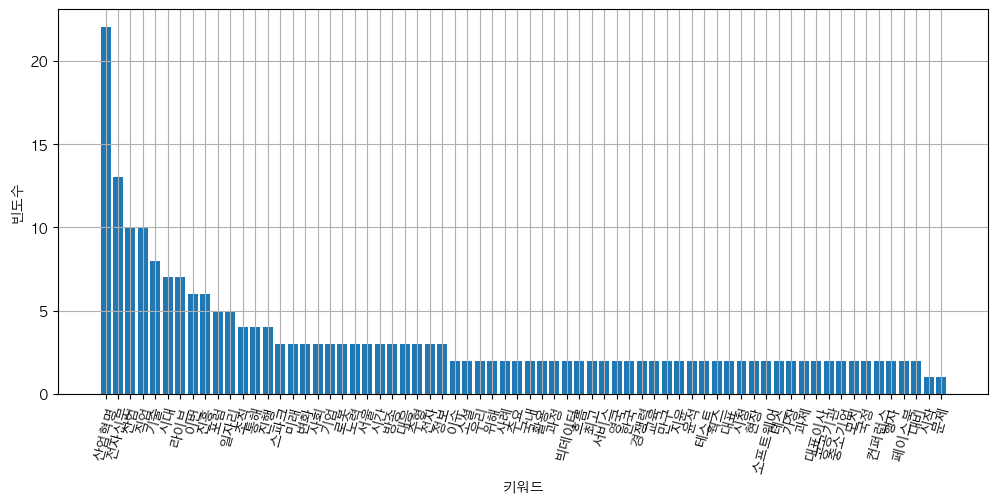

In [31]:
plt.figure(figsize = (12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 75)
plt.show()

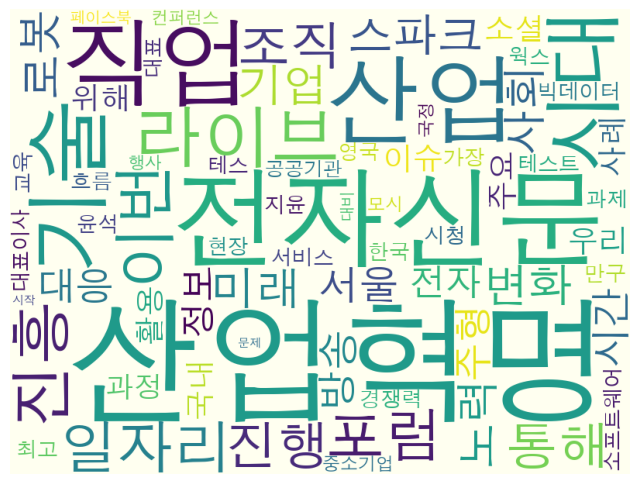

In [33]:
wc = WordCloud(font_path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()